In [214]:
from numpy import pi
from qiskit import QuantumCircuit, execute, Aer
import matplotlib.pyplot as plt

Having worked with entanglement, we now can begin to delve into some other interesting experiments that involve its results. One experiment that deals with our non-locality result is called "Elitzur-Vaidman Bombs."

The setup of this experiment will have a series of mirrors and a beam splitter. We will use the following components:

$S$ = switch, acts as mirror if closed, lets photon through if open

$R$ = rotator, rotates photon polarization by $\theta$ in clockwise direction only when reflecting off right side

$BS$ = beam splitter, splits beam into horizontal and vertically polarized components

$M_{1}$ and $M_{2}$ = mirrors

The components are setup as:


![title](./eli_vaid_setup.png)

Where the arrows indicate the direction the photon is traveling, and we have labled the various branches with numbers so we can more easily refer to them later. As noted in the diagram, branch 3 which reflects off $M_{2}$ is the vertical component of the beam from $BS$, and branch 2 reflecting off $M_{1}$ is the horizontal component of the beam.

Let's start with the case where $R$ rotates a photon's polarization by $15^{\circ}$ when reflecting off of its right side, and the initial polarization of the photon is $|H\rangle$. What would the state of the photon be after it passes through the switch, goes through $BS$, reflects off $R$, and goes through the $BS$ again? Well we note that going through the beam splitter and then recombining after reflection off $M_{1}$ and $M_{2}$ does not actually change the state at all, so the only affect we are going to see is a rotation from the one reflection off of $R$:

$|\psi\rangle = \mathrm{cos}(15^{\circ})|H\rangle+\mathrm{sin}(15^{\circ})|V\rangle$

What if we keep the setup the same, but instead reflect off of $R$ and pass through $BS$ three total times? What would the state be right before we reflect off $M_{1}$ and $M_{2}$ after the third reflection? Well, again we just get some rotations from reflecting off of $R$, so we find that the initial state has been rotated by $3\times15^{\circ}=45^{\circ}$, so:

$|\psi\rangle = \mathrm{cos}(45^{\circ})|H\rangle+\mathrm{sin}(45^{\circ})|V\rangle$

In fact, if we did this reflection 6 times we would rotate the initial state by $90^{\circ}$ into $|V\rangle$.

Now consider a new case where we modify the setup. We replace $M_{2}$ (the mirror on the vertical component branch of $BS$) with a screen that lights up when it is hit by a photon. This effectivley acts as a measurement of the photon's polarization each time we pass through the beam splitter. What is the probability of the screen lighting up on after the first reflection off $R$ and passing back through $BS$? We previously found the state after the first reflection to be:

$|\psi\rangle = \mathrm{cos}(15^{\circ})|H\rangle+\mathrm{sin}(15^{\circ})|V\rangle$

So the probability the screen lights up is exactly the probability the photon would be measured to be in the $|V\rangle$ state (as the branch we put the light detector on is the vertical polarization branch of $BS$):

Prob ( Screen Lights Up after 1 Reflection ) = $\mathrm{sin}^{2}(15^{\circ})$

What if now we let the photon reflect twice, what would be the probability that the screen has been hit in this time? This question is a bit trickier. What we want to analyze is finding the probability that the screen does light up in this case, then subtract that probability from 1 (as that will give us the probability that the photon never hits the screen). A subtlety comes in when we consider the state after the first reflection. We notice that the screen did not light up, meaning the state of the photon after passing through the beam splitter once is $|H\rangle$, as we know it cannot be $|V\rangle$ or the screen would be lit up! Thus, the probability that the screen lights up after each reflection would still be $\mathrm{sin}^{2}(15^{\circ})$, as each time we notice the screen doesn't light up correspinds to the state collapsing back into $|H\rangle$ (which was our initial state). This makes our calculation easier:

Prob ( Never Light up Screen in 2 Reflections ) = Prob ( Photon is in $|H\rangle$ State 2 Times ) = $\mathrm{cos}^{2}(15^{\circ})\times\mathrm{cos}^{2}(15^{\circ}) = \mathrm{cos}^{4}(15^{\circ})$

$\implies$ Prob ( Screen Lights Up Sometime during 2 Reflections ) = 1 - Prob ( Never Light up Screen in 2 Reflections ) = $1-\mathrm{cos}^{4}(15^{\circ})$

What if we let it reflect 6 times? What is the probability the screen lights up in this time? Using the same argument as before, we can easily write down the answer:

Prob ( Screen Lights up Sometime in 6 Reflections ) = $1-(\mathrm{cos}^{2}(15^{\circ}))^{6} = 1-\mathrm{cos}^{12}(15^{\circ})$

Now consider replacing the light screen with something more exciting: a bomb hooked up to a photodetector. If the photodector is triggered (i.e. a photon hits it) the bomb explodes. However, the bomb could be a dud in which case the photodetector just acts as a mirror to reflect the photon. Note that if the bomb is a dud and acts as a mirror, we are back to the original setup with $M_{1}$ and $M_{2}$.

What would happen if the bomb were a dud, and we sent the photon through 6 times before opening the switch and letting the photon back out? We found earlier that after 6 reflections at $15^{\circ}$ each leaves the photon in the state $|V\rangle$. So, _if the bomb is a dud and we let the photon reflect 6 times, we are garunteed to find the photon in state $|V\rangle$ afterwards_.

What if the bomb is live? Then, we are back to the case where we have a screen that lights up on the vertical branch of $BS$. What is the probability that the bomb does not explode after 6 reflections, and what would the state of the photon be afterwards? Well, the probability the bomb does not explode would be the same as the probability the screen did not light up after 6 reflections, so:

Prob (Bomb does not Explode ) = $1-\mathrm{cos}^{12}(15^{\circ}) \approx 0.34$

If the bomb did not explode, then the photon was on the horizontal branch the entire time, _so the final state of the photon is $|H\rangle$_. Let's sum up what we just found:

If the bomb is a dud, we will measure the final state of the photon to be $|V\rangle$. If the bomb is live, we will measure the final state of the photon to be $|H\rangle$ (or it might explode with probability $\approx 0.34$).

Let's consider what this means. If we measure the bomb is a dud, nothing all the interesting has happened. We just had the photon's polarization get rotated enough times so that eventually it is in the $|V\rangle$ state. The case where the bomb is live is much more interesting. If the bomb did not explode, then we know that the photon never hit the bomb, so it was along the horizontal branch the entire time. That is, _we determined that the bomb was live without having ever interacted with it_. This is what is called "interaction-free measurement," and utilizes the nonlocality of quantum mechanics as the particle and object never interacted in any way for us to determine the bomb was live.

The probability of the bomb going off was $\approx 0.34$, which isn't ideal, but we can actually make this probability arbitrarily small! To do this, we note that the only real restriction we had regarding the angle the rotator uses is that after $N$ reflections, the polarization needs to be rotated by $90^{\circ}$. This would imply that the angle the polarization is rotated by for an $N$ reflection test is $\frac{90^{\circ}}{N}$. Using the same analysis as before, the probability the bomb explodes when it is live is then:

Prob ( Bomb Explodes in $N$ Reflection Test ) = $1-(\mathrm{cos}^{2}(\frac{90^{\circ}}{N}))^{N} = 1-\mathrm{cos}^{2N}(\frac{90^{\circ}}{N})$

For example, if we set $N=90$, then the probability that the bomb explodes when it is live is $1-\mathrm{cos}^{180}(1^{\circ}) \approx 0.027 = 2.7\%$

So the more times we reflect the photon, the smaller the angle it is rotated through each reflection, and the smaller the chance the bomb explodes when the bomb is live!

We can use the machinery we developed in the precious section on Bell's Inequality to build an example of this experiment on a quantum computer. The case where the bomb is a dud is not all that interesting as it just rotates the qubit into the $|1\rangle$ state from the initial $|0\rangle$ state. Instead, we focus on recreating the experiment when the bomb is live. We recall that we associated $|0\rangle$ with $|H\rangle$, and $|1\rangle$ with $|V\rangle$, and a rotation of the polarization by $\theta$ was a rotation of the qubit statevector by $2\theta$ about the X-axis. The way we will approach this is to build a function which performs a single rotation and measurement (bomb explodes/no explosion) then apply that $N$ times to simulate one test, then run the test $M$ times to generate a histogram. Then, a $|0\rangle$ will represent us detecting the bomb is live without trigerring it, and a $|1\rangle$ will represent us setting off the bomb.

In [272]:
# SET NUMBER OF TIMES SIMULATION IS PERFORMED
M = 100

In [273]:
# SET NUMBER OF REFLECTIONS (N)
N = 6
theta = (pi)/N # 90 degrees * 2 / N

In [274]:
# CREATE FUNCTION WHICH PERFORMS A SINGLE REFLECTION AND MEASUREMENT
def reflection():
    qc = QuantumCircuit(1,1)
    qc.rx(pi/N,0)
    qc.measure(0,0)
    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc,backend,shots=1).result().get_counts()
    return results


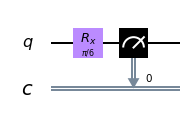

In [275]:
# IMAGE OF REFLECTION CIRCUIT FOR CONVENIENCE, NOT USED
qc_image = QuantumCircuit(1,1)
qc_image.rx(pi/N,0)
qc_image.measure(0,0)
qc_image.draw('mpl')

In [276]:
# RUN SIMULATION
expCount = 0 # keep track of how many times explosion happens
for j in range(0,M): # simulation loop
    for i in range(0,N): # reflection loop
        res = int(list(reflection().keys())[0]) # result from reflection
        if (res == 1): # if explosion happens, increment counter and end experiment
            expCount += 1
            break

<BarContainer object of 2 artists>

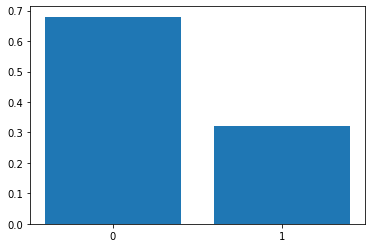

In [277]:
y_pos = ["0","1"]
plt.bar(y_pos,[(M-expCount)/M,(expCount)/M])

In [278]:
print("Percentage of Bomb Explosions: "+ str((expCount)/M))

Percentage of Bomb Explosions: 0.32


Above, we used $N = 6$ which corresponds to our original $15^{\circ}$ rotation experiment. As we can see from the result, we do indeed find that the bomb explodes $\approx 34\%$ of the time. This code will allow us to examine how changing the number of reflections (and thus angle of rotation) allows us to make this measurement safer to the observer by reducing the chance of detonation. Making $N$ or $M$ large increase the amount of time out code needs to run, so be careful in setting those too high.